In [9]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
import base64
import os

from backend.langraph_agent.retriever import load_hybrid_retriever
from backend.langraph_agent.agent import build_langgraph_agent

import warnings

# Ignore uniquement les warnings de dépréciation LangChain
warnings.filterwarnings("ignore")

load_dotenv()

True

In [10]:
llm = ChatOpenAI(
        api_key=os.getenv("OPENAI_API_KEY"),
        model="gpt-4o",
        temperature=0.1)

retriever = load_hybrid_retriever(
        index_path="./vectorstore/faiss_vectorestore",
        pickle_path="./vectorstore/documents.pkl",
        model_path="./bge-m3"
    )

In [11]:
compiled_graph = build_langgraph_agent(retriever, llm)  

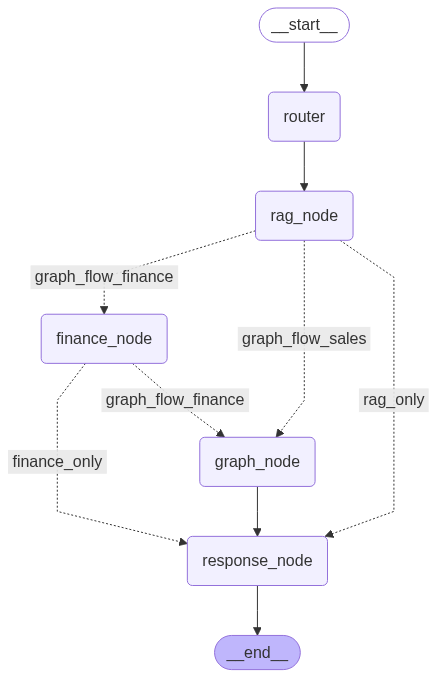

In [13]:
Image(compiled_graph.get_graph().draw_mermaid_png())

In [1]:
result = compiled_graph.invoke({"question": "What was the total number of vehicles sold by Renault in 2023?"})
print(result['final_response'])

NameError: name 'compiled_graph' is not defined

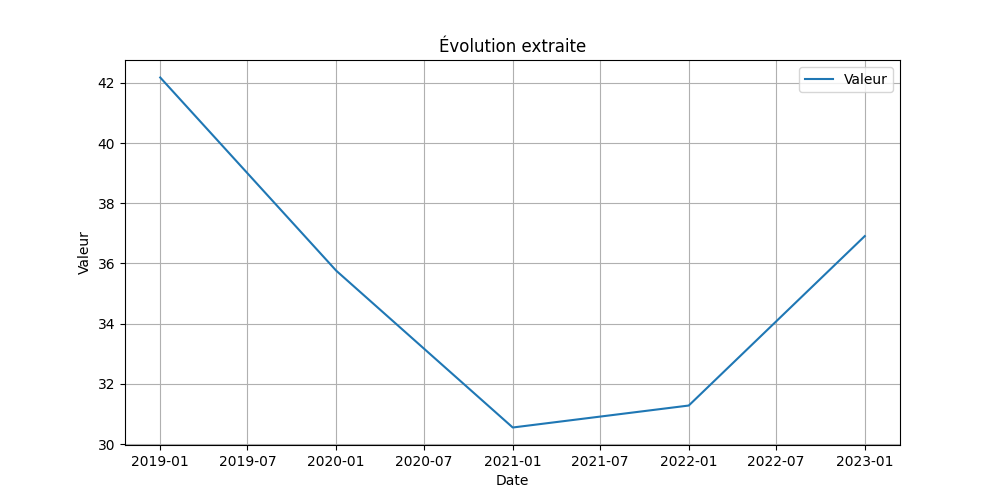

In [49]:
base64_data = result['final_response']  # ou ta variable encodée
display(Image(data=base64.b64decode(base64_data.split(",")[1])))